# Linear Regression + Ridge & Lasso Regression 

In [94]:
# Run the code cell below
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn import datasets, linear_model, preprocessing, model_selections, metrics
import sklearn.model_selection
from sklearn.model_selection import KFold
%matplotlib inline



# Data Import
Import the data from the file. Process data into dataframes and then into X,Y numpy arrays.

In [95]:

#df = pd.read_csv('/Users/Farhad_Ahmed/Desktop/ML intros/ML Project/HS_Regents_Sat_Scores_2015.csv')
df = pd.read_csv('HS_Regents_Sat_Scores_2015.csv')
#print(df)
#data = df.values

# extract all the columns that we need
df1=np.stack((df['Algebra2/Trigonometry'], df['English'], df['Geometry'],df['Global History and Geography'], df['Integrated Algebra'], df['Living Environment'], df['Physical Settings/Chemistry'], df['Physical Settings/Physics'], df['Average SAT Score (Total)'])).T

#remove any empty rows
df2=(df1[~np.isnan(df1).any(axis=1)])
#print(df2)
#print(df2.shape)

# df3 will be our feature matrix
df3 = df2[:,:8]
#print(df3)

# df4 will be the target vector
df4 = df2[:,8:]
#print(df4)

X = np.array(df3)
Y = np.array(df4)



    # Splitting Data Into Training And Test Set Using K-Fold. Do the next steps for each K-Fold Training and Test set

# Step 0: Fit a linear model and print the testset error. 

# Step 1: Ridge Regression
Fit a ridge model using linear_model.ridge(warm_start=True, fit_intercept = True). The alphas variable contaings 100 values of regularization parameter. Fit 100 models with these 100 different values of alphas and find test errors for all these 100 models and plot test error v/s alpha. 

# Step 2: Plotting Test Error v/s Alphas
Plot test errors v/s alphas in the code cell below.

# Step 3: Lasso Regression
Ffit a lasso model using linear_model.Lasso(warm_start=True, fit_intercept = True). 
The alphas variable contaings 200 values of the regularization parameter. 
Fit 200 models with these 200 different values of alphas and find test errors for all these 200 models and plot test error v/s alpha.

# Step 4: Plotting Test Error v/s Alphas
Plot test errors v/s alphas in the code cell below.

# Step 5. Display the coefficients


The test set error for split # 1  is:  6457.075420465327 



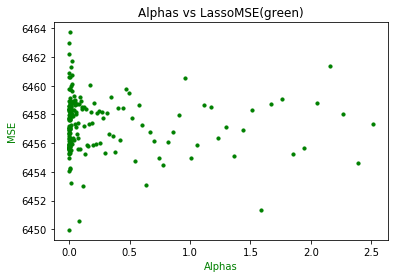

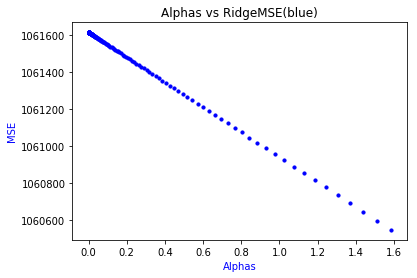

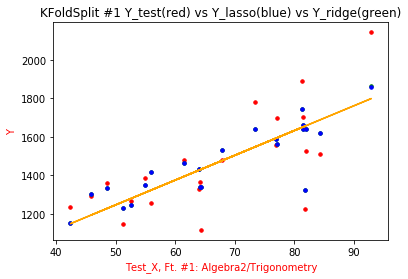

R^2 =  0.8168854810085892


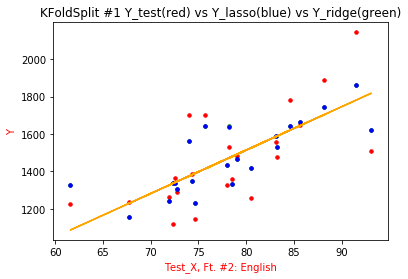

R^2 =  0.8171144063185682


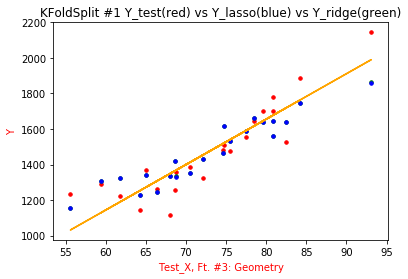

R^2 =  0.820358044051531


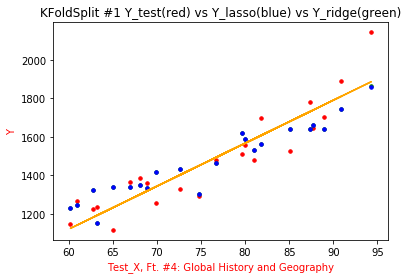

R^2 =  0.8174941324129181


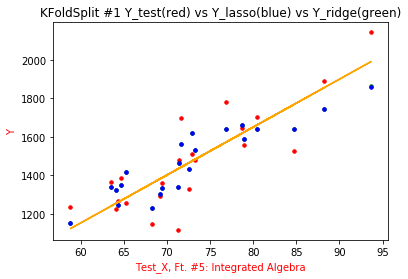

R^2 =  0.8201384483485388


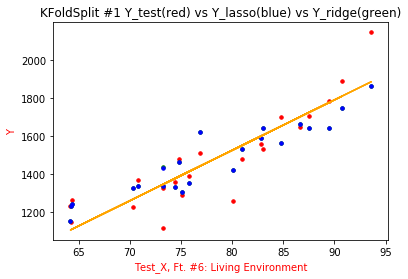

R^2 =  0.8184695004087283


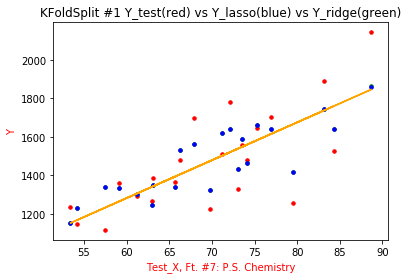

R^2 =  0.819218345662489


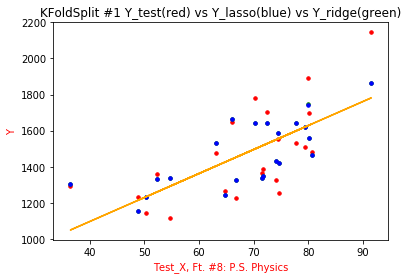

R^2 =  0.8168735698252236
The test set error for split # 2  is:  6763.420098067407 



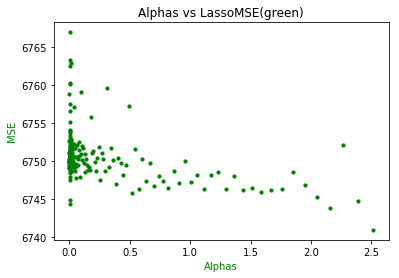

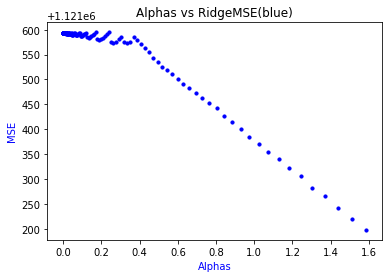

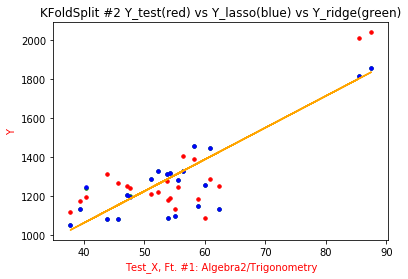

R^2 =  0.7769457086108003


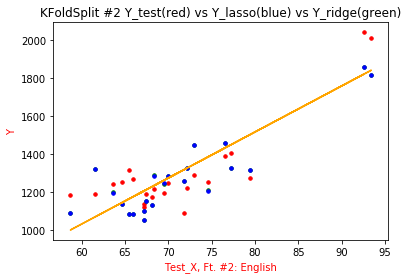

R^2 =  0.773461342719306


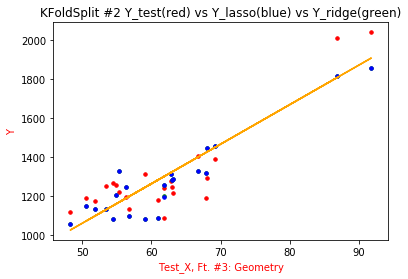

R^2 =  0.7756168353546593


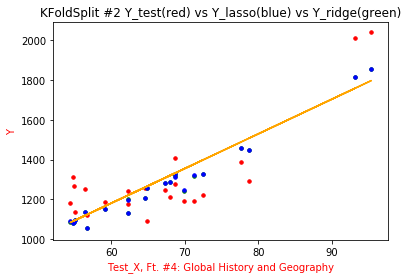

R^2 =  0.7721666369103402


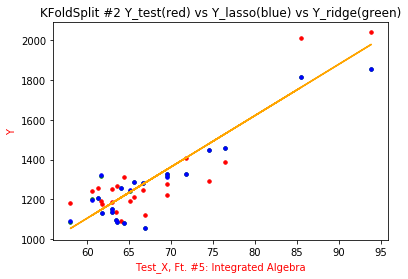

R^2 =  0.7756700867781031


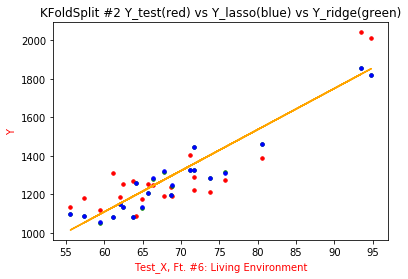

R^2 =  0.7730168901331045


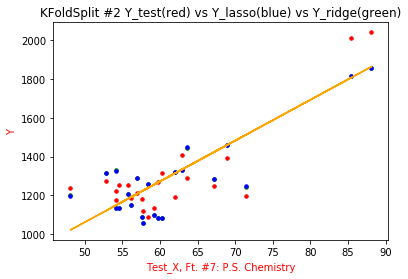

R^2 =  0.7762344902349385


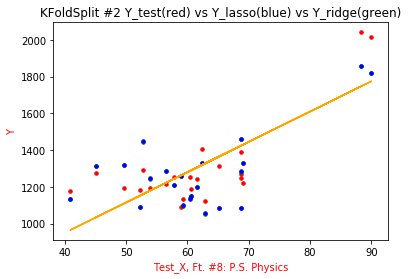

R^2 =  0.7741918526200313
The test set error for split # 3  is:  3891.3920363946104 



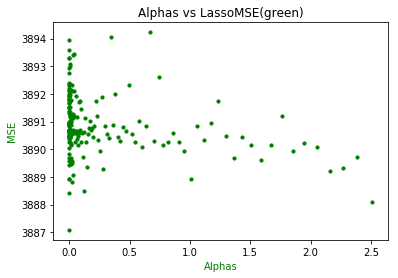

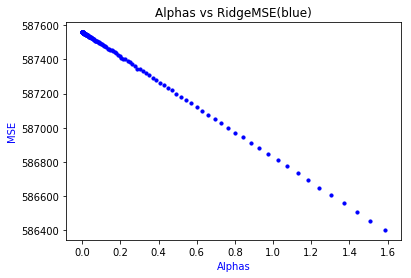

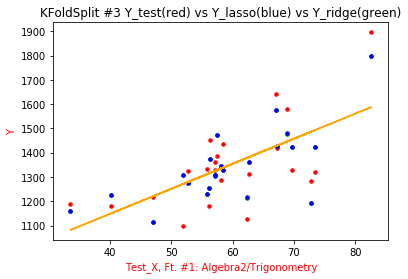

R^2 =  1.0407374127684745


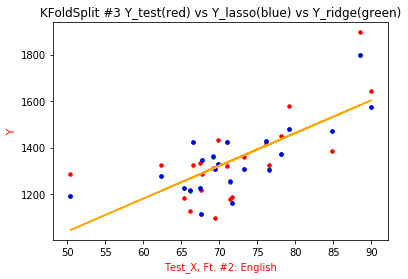

R^2 =  1.0336139608908679


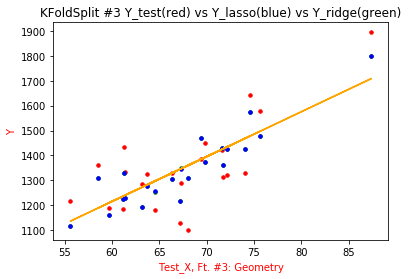

R^2 =  1.040732925492275


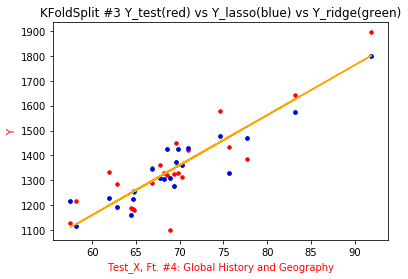

R^2 =  1.0406392300380194


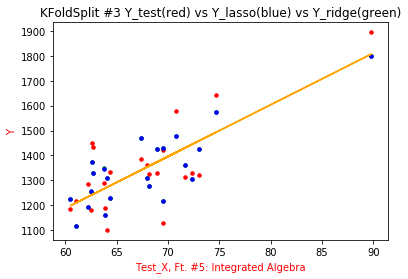

R^2 =  1.042813439609778


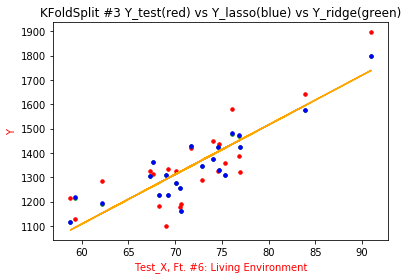

R^2 =  1.0389143256612958


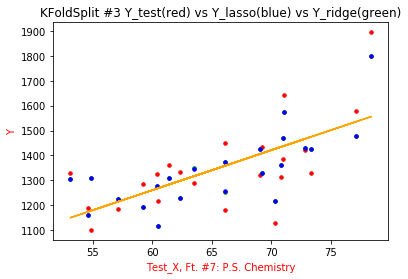

R^2 =  1.0407371536627728


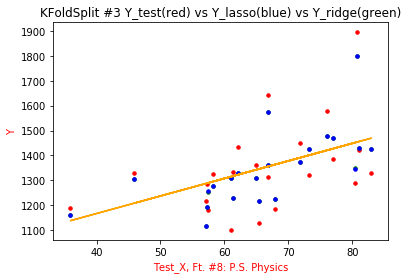

R^2 =  1.0328037527417198
The test set error for split # 4  is:  5510.549546842476 



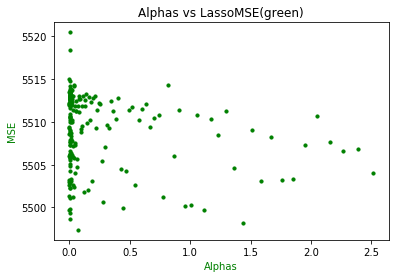

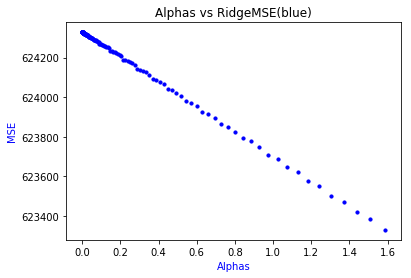

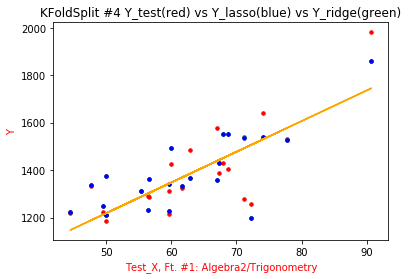

R^2 =  1.0464431094726465


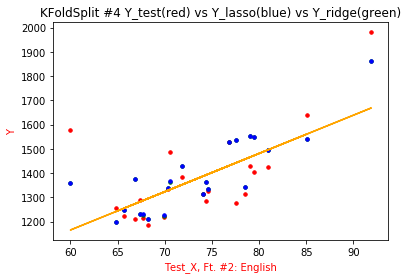

R^2 =  1.040048692951407


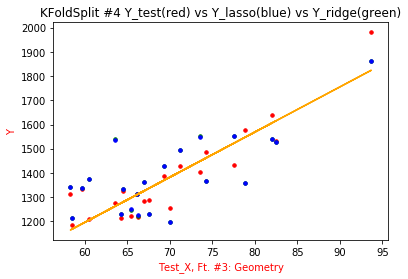

R^2 =  1.0450765919667306


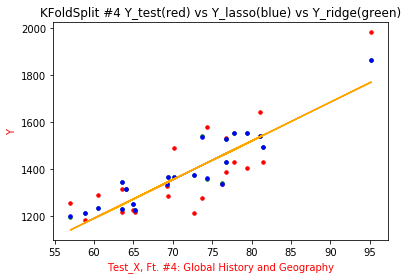

R^2 =  1.0419801361820822


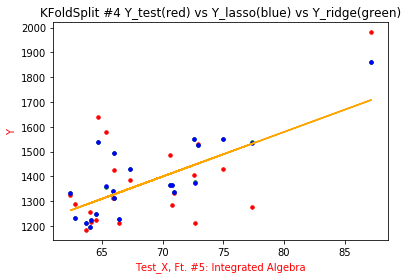

R^2 =  1.0457943681660424


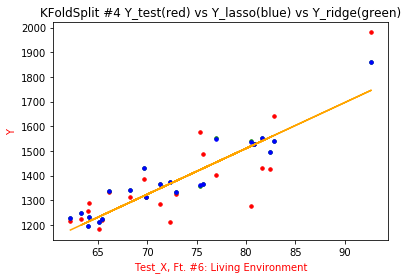

R^2 =  1.0426075888696062


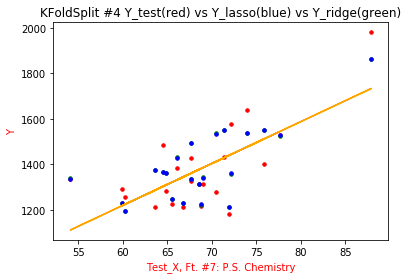

R^2 =  1.0462162141738625


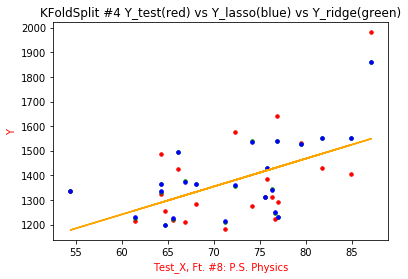

R^2 =  1.037654789494451
The test set error for split # 5  is:  7724.575669266939 



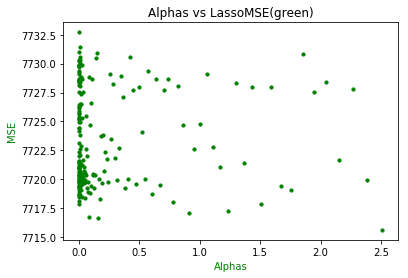

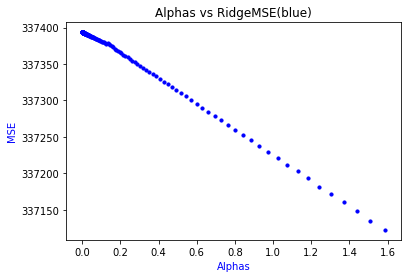

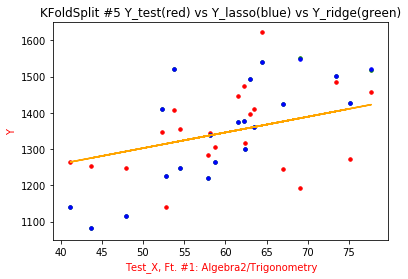

R^2 =  1.861887105569213


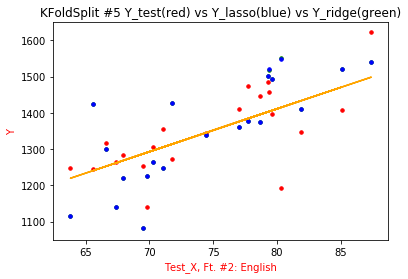

R^2 =  1.8469079042073921


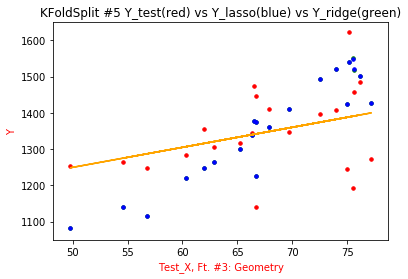

R^2 =  1.8488312596744643


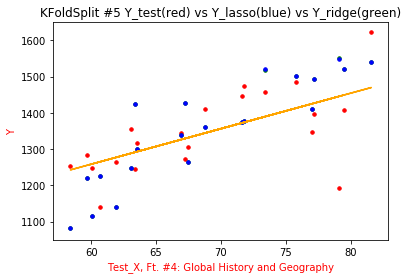

R^2 =  1.854317410097043


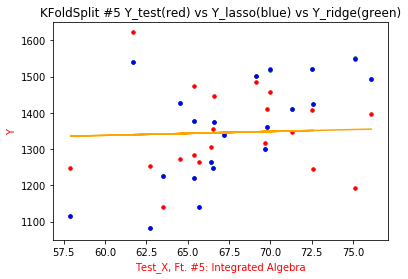

R^2 =  1.8396319346297298


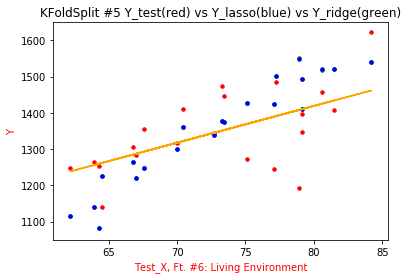

R^2 =  1.8471056690551177


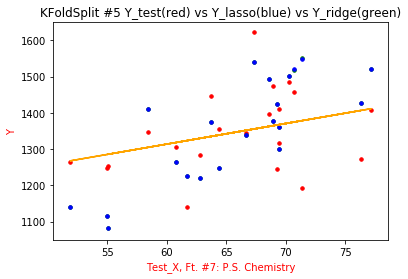

R^2 =  1.8530052391728264


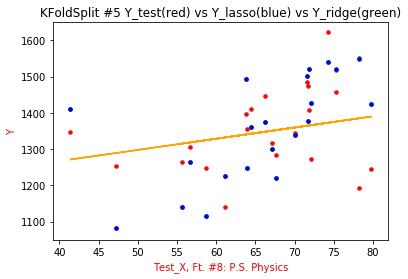

R^2 =  1.8475849035852685


In [113]:
kf = KFold(n_splits=5)
splitCounter = 1

featureDict = {0:"Algebra2/Trigonometry", 
               1:"English", 
               2:"Geometry", 
               3:"Global History and Geography", 
               4:"Integrated Algebra",
               5:"Living Environment",
               6:"P.S. Chemistry",
               7:"P.S. Physics"}

for train, test in kf.split(X):
    
    X_train, X_test, Y_train, Y_test = X[train], X[test], Y[train], Y[test]
    
    '''
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)                   # zero mean and unit variance
    X_test = scaler.transform(X_test)                     # 
    '''
    
    '''
    ____________________________________________________
    '''
    #fit Model
    lin_fit_model = linear_model.LinearRegression()
    lin_fit_model.fit(X_train, Y_train)

    #Calculate the  normalized MSE
    y_test_pred = lin_fit_model.predict(X_test)
    test_set_error = np.sum((y_test_pred - Y_test)**2) / (2*Y_test.shape[0]) 
    print("The test set error for split #", splitCounter, " is: ", test_set_error,"\n")
    
    # Ridge Model
    model = linear_model.Ridge(fit_intercept = True, solver = 'sag')
    nalpha = 200
    alphas = np.logspace(-4,0.4,nalpha)
    ridge_error_array = []
    ridge_pred_dict = {}
    for x in range(nalpha):
        model.alpha = alphas[x]
        model.fit(X_train,Y_train)  
        pred = model.predict(X_test)
        error = np.sum((pred-Y_test)**2)/(2*Y_test.shape[0])
        ridge_error_array.append(error)
        coefficients = model.coef_
        ridge_pred_dict[error] = (pred,coefficients,np.sum(coefficients != 0))
        
    
    plt.scatter(alphas,ridge_error_array,color="green",s=10)
    plt.xlabel('Alphas',color="green")
    plt.ylabel('MSE',color="green")
    plt.title("Alphas vs LassoMSE(green)")
    plt.show()
    
    # Lasso Model
    model = linear_model.Lasso(warm_start=True, fit_intercept = True)
    nalpha = 200
    alphas = np.logspace(-4,0.2,nalpha)
    lasso_error_array = []
    lasso_pred_dict = {}
    for x in range(nalpha):
        model.alpha = alphas[x]
        model.fit(X_train,Y_train)
        pred = model.predict(X_test)
        error = np.sum((pred-Y_test)**2)/(2*Y_test.shape[0])
        lasso_error_array.append(error)
        coefficients = model.coef_
        lasso_pred_dict[error] = (pred,coefficients,np.sum(coefficients != 0))
        
    plt.scatter(alphas,lasso_error_array,color="blue",s=10)
    plt.xlabel('Alphas',color="blue")
    plt.ylabel('MSE',color="blue")
    plt.title("Alphas vs RidgeMSE(blue)")
    plt.show()
    
   
    #print("The Coefficients of the model w/ lowest MSE are: \n",coefficients)
    #print("The number of non-zero coefficients is:",str(non_zeros))  
    #print("The Coefficients of the model w/ lowest MSE are: \n",coefficients)
    #print("The number of non-zero coefficients is:",str(non_zeros))  
    '''
    _________________________________________
    '''
    
    
    for feature in range(0,8):
        """
        lin_fit_model = linear_model.LinearRegression()
        lin_fit_model.fit(X_train[:,feature].reshape(-1, 1), Y_train)
        
        y_test_pred = lin_fit_model.predict(X_test[:,feature].reshape(-1, 1))
        #print(y_test_pred)
        
        test_set_error = np.sum((y_test_pred - Y_test)**2) / (2*Y_test.shape[0]) 
        print("The test set error for split #", splitCounter, " is: ", test_set_error,"\n")
        
        plt.scatter(X_test[:,feature],Y_test,color="red",s=12) 
        
        X_train = X_train[:,feature].reshape(-1, 1)
        X_test = X_test[:,feature].reshape(-1, 1)
        
         # Ridge Model
        model = linear_model.Ridge(fit_intercept = True, solver = 'sag')
        nalpha = 5
        alphas = np.logspace(-2,2,nalpha)
        ridge_error_array = []
        ridge_pred_dict = {}
        for x in range(nalpha):
            model.alpha = alphas[x]
            model.fit(X_train,Y_train)  
            pred = model.predict(X_test)
            error = np.sum((pred-Y_test)**2)/(2*Y_test.shape[0])
            ridge_error_array.append(error)
            coefficients = model.coef_
            ridge_pred_dict[error] = (pred,coefficients,np.sum(coefficients != 0))
            print(pred)

        plt.scatter(alphas,ridge_error_array,color="green",s=10)
        plt.xlabel('Alphas',color="green")
        plt.ylabel('MSE',color="green")
        plt.title("Alphas vs LassoMSE(green)")
        plt.show()

        # Lasso Model
        model = linear_model.Lasso(warm_start=True, fit_intercept = True)
        nalpha = 5
        alphas = np.logspace(-2,2,nalpha)
        lasso_error_array = []
        lasso_pred_dict = {}
        for x in range(nalpha):
            model.alpha = alphas[x]
            model.fit(X_train,Y_train)
            pred = model.predict(X_test)
            error = np.sum((pred-Y_test)**2)/(2*Y_test.shape[0])
            lasso_error_array.append(error)
            coefficients = model.coef_
            lasso_pred_dict[error] = (pred,coefficients,np.sum(coefficients != 0))

        plt.scatter(alphas,lasso_error_array,color="blue",s=10)
        plt.xlabel('Alphas',color="blue")
        plt.ylabel('MSE',color="blue")
        plt.title("Alphas vs RidgeMSE(blue)")
        plt.show()
        """
        
        plt.scatter(X_test[:,feature],Y_test,color="red",s=12) 
        plt.scatter(X_test[:,feature],ridge_pred_dict[min(ridge_pred_dict.keys())][0],color="green",s=12)
        plt.scatter(X_test[:,feature],lasso_pred_dict[min(lasso_pred_dict.keys())][0],color="blue",s=12)

        m,b = np.polyfit(X_test[:,feature],Y_test, 1)
        plt.plot(X_test[:,feature], m*X_test[:,feature] + b, '-',color = "Orange")

        plt.title('KFoldSplit #' + str(splitCounter) + ' Y_test(red) vs Y_lasso(blue) vs Y_ridge(green)' )
        plt.xlabel('Test_X, '+'Ft. #' + str(feature+1) + ": " + featureDict[feature], color="red")
        plt.ylabel('Y', color="red")
        plt.show()
        
        # r-squared
        p = np.poly1d(m,b)
        r = sklearn.metrics.r2_score(Y_test, p(X_test[:,feature]))
        print("R^2 = ", str(r)
    
    splitCounter += 1